# SAE : Implémentation d'un besoin client
# <center> Codage et décodage </center>

L'objectif de ce projet est d'implanter différentes techniques de codage et décodage de l'information. 
Plus précisément, on s'intéressera ici à deux  méthodes qui ont des objectifs assez différents: 
- le **codage à bit de parité simple** qui permet de vérifier que l'information reçue n'a pas été altérée au cours de la transmission;
- le **chiffrement de César** qui permet de chiffrer l'information à transmettre.

**Ce projet est à faire en binôme.**

#### Planning
- Pour le 4 octobre : implanter les fonctions de la partie préliminaire et comprendre le principe du codage à bit de parité simple. 
- Pour le 11 octobre : implanter les fonctions de ârtie codage à bit de parité simple et comprendre le principe du chiffrement de césar.
- Pour le 18 octobre : implanter les fonctions et programmes des questions 1 à 5 de la partie chiffrement de César.
- Pour le 24 octobre : implanter les fonctions et programmes des questions 6 à 8 de la partie chiffrement de César 
- **Rendu** : l'ensemble est à envoyer au plus tard le dimanche **24 octobre**.

Pour chaque fonction demandée, un exemple d'appel ou des tests unitaires sont donnés de manière à vérifier la conformité de votre proposition.

Lorsque l'on convertit des chaînes de caractères en nombres et *vice versa*, on a souvent recours à des **casts**. 

Lorsque l'on manipule des caractères, il est également utile d'accéder à leur unicode et *vice versa*. En Python, cela se fait via les fonctions `ord` et `chr` respectivement.

## Préliminaires

Pour implanter les différentes méthodes de codage et décodage, certaines fonctions sont bien utiles. Ce sont ces fonctions qui font l'objet de cette partie préliminaire.

### Question 1 : Saisie contrôlée d'un entier positif
Ecrire une fonction  de saisie contrôlée `saisieIntPos` demandant à l'utilisateur un entier positif ou nul et le lui redemandant jusqu'à ce que ce soit un entier positif ou nul.

In [1]:
def saisieIntPos():
    """
    :Cette fonction permet la saisie répétée d'un entier 
    :jusqu'à ce que celui-ci devient positif ou nul
    """
    entier = int(input("Saisir un entier positif ou nul: "))
    while entier < 0 :
        entier = int(input("Saisir un entier positif ou nul: "))
    return entier

In [3]:
# ------------  TEST/EXEMPLE ---------- #
print("l'entier saisi est", saisieIntPos())

Saisir un entier positif ou nul: -1
Saisir un entier positif ou nul: 2
l'entier saisi est 2


### Question 2 : Saisie d'un entier positif  qui s'écrit sur 10 bits
Le plus grand entier positif que l'on puisse écrire en binaire sur 10 bits est 1023 (car 10000000000 en binaire vaut 1024 en décimal).

Ecrire une fonction  de saisie contrôlée `saisieIntPos10Bits` demandant à l'utilisateur un entier compris entre 0 (inclus) et 1023 (inclus) et lui redemandant un entier jusqu'à ce que ce soit qu'il soit correct.

In [4]:
def saisieIntPos10Bits():
    """
    :Cette fonction permet la saisie répétée d'un entier 
    :jusqu'à ce que celui-ci soit dans l'intervalle [0, 1023]
    """
    entier =int(input("Saisir un nombre entre 0 et 1023: "))
    while entier < 0 or entier > 1023 :
        entier =int(input("Saisir un nombre entre 0 et 1023:  "))
    return entier

In [6]:
# ------------  TEST/EXEMPLE ---------- #
print("l'entier saisi est",saisieIntPos10Bits())

Saisir un nombre entre 0 et 1023: -1
Saisir un nombre entre 0 et 1023:  1024
Saisir un nombre entre 0 et 1023:  1023
l'entier saisi est 1023


### Question 3 : Saisie contrôlée d'un entier compris entre a et b
Ecrire une fonction  de saisie contrôlée `saisieIntab` demandant à l'utilisateur un entier compris entre a (inclus) et b (inclus) et lui redemandant un entier jusqu'à ce que ce soit qu'il soit dans le bon intervalle.

On ne vérifiera pas que a est plus petit que b.

In [ ]:
def saisieIntab (a, b):
    """
    :Cette fonction permet la saisie répétée d'un entier x 
    :compris entre a et b, jusqu'à celui-ci soit entre a et b
    """
    print("Saisir un nombre entre", a, "et", b,": ") 
    x = int(input())
    while x < a or x > b :
        print("Saisir un nombre entre", a, "et", b,": ")
        x = int(input())
    return x

In [ ]:
# ------------  TEST/EXEMPLE ---------- #
print("l'entier saisi est",saisieIntab(1,25))

### Question 4 : Verification de la binarité d'une chaîne
Ecrire une fonction `verifBin` qui permet de vérifier qu'une chaîne de caractères ne contient que des `0` et des `1`.
Elle prendra en paramètre une chaîne de caractère `s_bin` et retournera `True` si la chaîne n'est composée que de`0` et de `1` et `False` sinon.

In [7]:
def verifBin(s_bin):
    """
    :Cette fonction permet de verifier la binarité d'une chaine
    :autrement dit que la chaine ne contient que des 0 et 1
    """
    char = 0  # on parcourt la chaine s_bin de caractere en caractere pour verifier qu'elle ne contient que des 0 et des 1
    while char < len(s_bin):
        if s_bin[char]!="0" and s_bin[char]!="1":  # si le caractere à l'indice char n'est pas 1 et 0 alors, on retourne False
            return False 
        char += 1
    return True # la chaine n'est composee que de 1 et de 0

In [8]:
# ------------  TEST/EXEMPLE ---------- #
def test_verifBin():
    assert verifBin('0000')
    assert verifBin('0110')
    assert not verifBin('2981')
    assert not verifBin('andei')
    assert not verifBin('2&@')
    print("test ok")

test_verifBin()

test ok


### Question 5 : Conversion d'un nombre décimal en binaire 

Pour transmettre l'information, on est souvent amené à convertir en binaire des nombres décimaux. Par exemple, Le nombre `13` écrit en base 10 se code `1101` en binaire.

*Comment effectuer ce codage ?*

On peut utiliser la méthode des divisions successives par 2.

**Rappels :** En Python,
- le quotient d'une division euclidienne s'obtient en utilisant l'opérateur `//` ; ainsi `5//2=2`
- le reste d'une division euclidienne s'obtient en utilisant l'opérateur `%`; ainsi `5%2=1`

```
   	             .
   	            / \   <--- sens de lecture des restes pour former le nombre binaire
13 // 2   = 6   	|   
13 %  2   = 1    |   reste = 1
                 |
6 // 2    = 3   	|   
6  %  2   = 0   	|   reste = 0
                 |  
3 // 2    = 1    |   
3 %  2    = 1    |   reste = 1
                 |
1  // 2   = 0  	 |                  <---- On arrête, car le quotient est égal à 0
1  % 2    = 1    |   reste = 1
   	             |                  
Le nombre 13 en base 10 se code 1101 en binaire.
```

Ecrire une fonction `int2bin` prenant en paramètre un entier positif `n` écrit en base 10  et retournant une chaine de caractères correspondant à ce nombre codé en binaire en utilisant la méthode des divisions successives.

On pensera à procéder à d'éventuels casts dans la fonction. On fera également attention au sens dans lequel on procède aux concaténations de chaînes de caractères.

Voici le prototype de la fonction :
```python
def int2bin(n):
    """
    :param n: nombre en base 10 à convertir en binaire
    :return: str contient la representation binaire de n
    """
```
**Note :** Aucun test ne sera fait dans la fonction pour vérifier la validité du paramètre.

In [9]:
def int2bin(n):
    """
    :param n: nombre en base 10 à convertir en binaire
    :return: str contient la representation binaire de n
    """
    nb_Bin = ""
    if n==0:                    # si le nombre n = 0 en base 2 est égal à lui-même soit 0
        return "0"
    while n > 0:               # lorsque le divisé est égal à 0, on arrête les divisions successives
        reste = n%2           # le reste de la division est concaténé à la chaine
        nb_Bin += str(reste) # le quotient de la division devient le nouveau divisé 
        n = n//2            # on divise par 2 car on veut un nombre en base 2 (binaire) 
                           
    return nb_Bin[::-1]    # on obtient la séquence inverse(à l'aide d'un pas de -1)  

In [10]:
# ------------  TEST/EXEMPLE ---------- #
def test_int2bin():
    assert int2bin(0)=='0'
    assert int2bin(7)=='111'
    assert int2bin(16)=='10000'
    print("test OK")
    
test_int2bin()

test OK


## 1ère Partie : Code à parité simple


Dans la technologie des objets de l'internet (IOT), il faut souvent transmettre des informations de capteurs  (par exemple, d'un capteur de température) vers un serveur (par exemple un serveur broker MQTT/*Message Queuing Telemetry Transport*).

Dans ce qui suit, on développe les outils logiciels qui interviennent dans la transmission d'un nombre entier (écrit en base 10).

Dans la partie préliminaire, une fonction de conversion de décimal en binaire a été définie. On sait donc comment mettre sous forme binaire l'information à transmettre. 

### Question 1 : Calcul du bit de parité

Lors d'une transmission, des erreurs peuvent se produire (dûes à des interférences par exemple). La technique dite du bit de parité permet de détecter simplement certaines erreurs.

**Principe :**
- comptage du nombre de `1` dans la représentation binaire d'une information,
- calcul du bit de parité : si le nombre de `1` est impair, le bit de parité vaut 1, sinon il vaut 0.

**Exemple :**
```
information = 1101
bit de parité  ---> 1
```
Ecrire une fonction `parite` prenant en paramètres une chaine de caractères représentant une information binaire et qui retourne `True` si le bit de parité vaut 1 (*i.e.*, si le nombre de 1 est impair), `False` sinon.

Voici le prototype de la fonction :
```python
def parite(str_bin):
    """
    Calcul du bit de parité du nombre binaire
    :param str_bin: str contenant la représentation binaire d'un nombre
    :return : bool, True -> bit de parité à 1, False -> bit de parité à 0
    """
```

In [11]:
def parite(str_bin):
    """
    Calcul du bit de parité du nombre binaire
    :param str_bin: str contenant la représentation binaire d'un nombre
    :return : bool, True -> bit de parité à 1, False -> bit de parité à 0
    """
    nombre_de_1 = str_bin.count('1')  # str_bin.count('1') compte le nombre de 1 dans str_bin
    if nombre_de_1 % 2 == 1:         # si le nombre de 1 est impair : le bit de parité vaut 1
        return True           
    return False                    # si le nombre de 1 est pair : bit de parité vaut 0

In [12]:
# ------------  TEST/EXEMPLE ---------- #
def test_parite():
    assert not parite('0000')
    assert parite('10000')
    assert not parite('1010')
    assert parite('11111')
    print("test ok")
    
test_parite()

test ok


### Question 2 : Constitution de la trame à envoyer

La trame à envoyer pour transmettre l'information est constituée de 11 bits :
- le bit le plus à gauche (de poids le plus fort) est le bit de parité ;
- les autres bits représentent l'information. Si l'information n'occupe pas tous les bits alors des `0` seront rajoutés en tête, par exemple si l'information n'occupe réellement que 4 bits (bit 0 à bit 3), tous les autres bits de poids supérieurs (bit 4 à bit 10) seront mis à zéro.

**Exemple :**
```
information = 1101
bit de parité ---> 1
la trame à envoyer est donc 10000001101
```

Ecrire une fonction `trame` prenant un nombre entier compris entre 0 et 1023 (c'est le nombre décimal maximal codable sur 10 bits) et qui retourne une chaîne de caractères correspondant à la trame qui sera effectivement envoyée.

Voici le prototype de la fonction :
```python
def trame(n):
    """
    Contruit une trame sur 11 bits sous la forme
    bit parite | bit 10 | bit 9 | .... | bit 1 | bit 0 |
    bit parite : est le bit de parité
    bit 10 à bit 0 : information à transmettre
    :param n: entier (en base 10) à transmettre dans la trame
    :return : str, trame sur 11 bits qui sera transmise
    """
```
**Note :** Aucun test ne sera fait dans la fonction pour vérifier la validité du paramètre.

In [13]:
def trame(n):
    """
    Contruit une trame sur 11 bits sous la forme
    bit parite | bit 10 | bit 9 | .... | bit 1 | bit 0 |
    bit parite : est le bit de parité
    bit 10 à bit 0 : information à transmettre
    :param n: entier (en base 10) à transmettre dans la trame
    :return : str, trame sur 11 bits qui sera transmise
    """
    n2bin = int2bin(n)     # convertir n en base 2, n2bin veut dire n into binaire
    while len(n2bin) < 10: 
        n2bin = '0' + n2bin       # zero ajoutes en tete si l'information soit n2bin n'occupe pas 10 bits
    if parite(n2bin) == False:   # si le nombre de 1 dans n2bin est pair et le bit de parité à 0
        n2bin = '0' + n2bin     # on ajoute 0 en tete de l'information n2bin et on retourne la valeur obtenue qui sera la trame
        return n2bin
    else:                      # si le nombre de 1 dans n2bin est impair et le bit de parité à 1
        n2bin = '1' + n2bin   # on ajoute 1 en tete de l'information n2bin et on retourne la valeur obtenue qui sera la trame
        return n2bin

In [14]:
# ------------  TEST/EXEMPLE ---------- #
def test_trame():
    assert trame(10)=='00000001010'
    assert trame(16)=='10000010000'
    assert trame(31)=='10000011111'
    assert trame(0)=='00000000000'
    print("test ok")

test_trame()

test ok


### Question 3 : Vérification de la validité de la trame reçue

Lors de la réception du message, on peut tester s'il n'y a pas eu de problème de transmission du message en vérifiant que la trame est correcte. Il faut en effet que le bit de parité corresponde bien au 10 bits qui le précède. 

- Ecrire une fonction `verifTrame` prenant une chaîne de 11 caractères binaires et qui retourne `True` si la trame est correcte (*i.e*, la chaîne est de longueur 11, elle est composée de `0`et de `1` et que le premier bit correspond bien au bit de parité des 10 bit précédents et `False` sinon. 
- Ecrire également une fonction `test_verifTrame` de tests unitaires permettant de vérifier la conformité de la fonction `verifTram`.

Voici le prototype de la fonction :
```python
def verifTrame(trm):
    """
    Vérifie si la chaine est binaire, de longueur 11, et que le 
    premier bit est le bit de parité des 10 bit précédents
    :param trm: une chaine de caractères 
    :return : bool, True -> c'est une trame de code de parité, 
    False sinon 
    """
```
On pensera à utiliser la fonction `verifBin()` définie dans la partie préliminaire.

In [17]:
def verifTrame(trm):
    """
    :Vérifie si la chaine est binaire, de longueur 11, et que le 
    :premier bit est le bit de parité des 10 bit précédents
    :param trm: une chaine de caractères 
    :return : bool, True -> c'est une trame de code de parité, 
    False sinon 
    """
    if len(trm) == 11:               # Si la chaine trm est de longueur 11 alors c'est une trame
        if trm[0] == '1' or '0':    # Si le premier bit est 1 ou 0, c'est le bit de parité de la trame trm
            if verifBin(trm):      # Si la trame trm est binaire alors on retourne True car on respecte toutes les conditions
                return True       # pour qu'une trame soit valide
    return False                 # Si l'une des trois conditions n'est pas respectée, la trame trm n'est pas valide

In [18]:
# ------------  TEST/EXEMPLE ---------- #
if verifTrame('00000001010'):
    print("la trame est valide")
else :
    print("erreur")

la trame est valide


In [19]:
def test_veriftrame():
    assert not verifTrame('0000')
    assert verifTrame('00000011110')
    assert verifTrame('10000000100')
    print("la trame est valide")
    
test_veriftrame()

la trame est valide


### Question 4 : Décodage de la trame reçue 
Après avoir vérifié que la trame est correcte, il reste à décoder l'information.
- Ecrire une fonction `decodeTrame()`qui prend en paramètre une trame que l'on suppose correcte et qui retourne sous forme décimale l'information contenue dans cette trame, *i.e* l'entier qui est codé en binaire.
- Ecrire également une fonction `test_decodeTrame` de tests unitaires permettant de vérifier la conformité de la fonction `decodeTram`.

In [26]:
def decodeTrame(trm):
    """
    :cette fonction prend en parametre une trame supposée correcte  
    :puis retourne la valeur décimale de l'information qu il contient
    :param trm: une chaine de caractères composée de 0 et 1
    """
    trm = trm[1::]                                    # on retire le bit de parite de la trame trm  = information 
    decimal = 0                                      # decimal est l'information binaire convertie en décimal
    for numero_val_trame, val in enumerate(trm):    # numero_val_trame est le numero de la valeur dans la trame(ordre croissant)
        n = 2 ** (len(trm) - numero_val_trame -1)  # n correspond à 2^poids du bit
        decimal += int(val) * n                   # val est 0 ou 1 donc on le cast en int
    return decimal                               # le nombre en décimal est la somme des val * n

In [27]:
# ------------  TEST/EXEMPLE ---------- #
print("00000001010 est le codage de ", decodeTrame("00000001010"))

00000001010 est le codage de  10


In [28]:
def test_decodeTrame():
    assert decodeTrame('00000001010') == 10
    assert decodeTrame('10000010000') == 16
    assert decodeTrame('10000011111') == 31
    assert decodeTrame('00000000000') == 0
    print("test ok")
test_decodeTrame()

test ok


### Question 5 : Programme principal
On souhaite pouvoir transmettre des nombres entre 0 et 1023 (qui est le plus grand entier que l'on écrire sur 10 bits).

- Demander à l'utilisateur de saisir un nombre en utilisant la fonction de saisie contrôlée appropriée définie dans la partie préliminaire.
- Coder ce nombre selon le codage à bit de parité simple à l'aide de la fonction définie précédemment.
- Afficher ce codage.
- Après avoir vérifié que la trame est correcte, decoder l'information à l'aide de la fonction définie pour cela.
- Afficher le nombre obtenu.
- Vérifier qu'il s'agit du nombre initial.

### Commentaires du programme principal

**ligne1** : on conserve le nombre retourné par la fonction saisieIntPos10Bits définie précédemment 

**ligne3** : on donne ici la trame envoyée par ce nombre puis on l'affiche en dessous

**ligne5** : on vérifie la validité de la trame envoyée

**ligne6** : si la trame est valide( if verifTram(trame_binaire) ) , on décode l'information et on l'affiche ensuite

**ligne8** : on vérifie si le nombre décodé correspond au nombre saisi en début de programme, si oui on l'affiche

In [34]:
nombre = saisieIntPos10Bits()
print("-------------")
trame_binaire = trame(nombre) 
print("Codage:", trame_binaire,"\n-------------")
if veriftrame(trame_binaire):   
    nombre_decode = decodetrame(trame_binaire) 
    print("Decodage:", nombre_decode)
    assert nombre_decode == nombre
    print("-------------\nOn obtient le nombre initial :", nombre_decode)
else:
    print('trame incorrecte')

Saisir un nombre entre 0 et 1023: 25
-------------
Codage: 10000011001 
-------------
Decodage: 25
-------------
On obtient le nombre initial : 25


## 2ème partie : Chiffrement de César

Le chiffrement de César est une des plus anciennes méthodes de cryptographie. Il repose sur la rotation vers la droite de l’alphabet d’un nombre fixé de caractères. 

Par exemple, si on considère une rotation de 3 positions, on obtient pour les lettres minuscules la table de conversion ci-dessous :



|lettre originale|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z|
|----------------|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|lettre codée    |d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z|a|b|c|

On a une table analogue pour les lettres majuscules. Les autres caractères ne sont pas cryptés mais simplement recopiés. 
 
Pour la rotation de 3 positions, si la phrase à chiffrer est `bonjour, il fait beau`, le message chiffré est alors `erqmrxu, lo idlw ehdx`. 

Il est bien sûr possible de changer le nombre de positions
correspondant à la rotation. Ainsi, si l'on décide de décaler d'une seule position, le même message est alors chiffré en `cpokpvs jm gbju cfbv`. 

Le nombre correspondant à la rotation est appelé la *clé* du code
car il permet le déchiffrementdu message. *La clé est un entier
  compris entre 1 et 25*.

L'objectif est d'écrire des fonctions de chiffrement et de déchiffrement de textes pour le code de César.

### Question 1 : Chiffrement d'un caractère
Ecrire une fonction `chiffreCar_cesar` prenant en paramètres
un caractère et la clé de chiffrement.  Cette fonction retournera le
caractère codé si le caractère est une lettre minuscule ou majuscule. Sinon, la fonction renverra le caractère initial.  Ainsi `chiffreCar_cesar('a',3)` renvoie `'d'`, `chiffreCar_cesar('d', 23)` renvoie `'a'`, `chiffreCar_cesar('C',4)` renvoie `'G'`.

**Indications :** 
On rappelle que l'on peut comparer des caractères avec les opérateurs `<,>, ==`et `!=`.

La fonction `ord(c)` retourne le code Unicode du caractère `c` et la fonction `chr(i)` retourne la lettre dont le code Unicode est `i`. Par exemple :
  ```python
  uni = ord("a") # uni vaut 97 car l'unicode de "a" est 97
  lettre = chr(98)  # lettre vaut "b" car 98 est son unicode
  print( chr(ord("a")) == "a") # affiche True
  ```
  
On rappelle que les unicodes des lettres minuscules sont consécutifs, compris entre 97 et 122  et suivent l'ordre alphabétique :  l'unicode de `'a'` est 97, celui de `'b'` est 98, etc, celui de `'z'` est 12. Il en est de même pour les unicodes des lettres majuscules qui varient de 65 pour `'A'`à 90 pour `'Z'`.

## Commentaires de chiffreCar_cesar

**ligne2** : code correspond au code ASCII du caractère

**ligne3** : Si le caractère n'est pas une majuscule ou n'est pas une minuscule, on le renvoi sans le chiffrer

**ligne6** : Si le code ASCII caractère décalé est plus grand que 'z' ou que si le code ASCII du caractère décalé est plus grand que 'Z' et de base une majuscule alors on fait un décalage inverse de 26 pour rester avoir une minuscule dans le premier cas et une majuscule dans le deuxième cas mais pas autre chose que des lettres non accentuées.

**ligne8** : on retourne le caractère décalé grace à la fonction chr()

In [31]:
def chiffreCar_cesar(caractere, cle_chiffrement):
    """
    Cette fonction prend en paramètres un caractère et la clé de chiffrement. 
    Cette fonction retournera le caractère codé si le caractère est une lettre minuscule ou majuscule. 
    Sinon, la fonction renverra le caractère initial. 
    """
    code = ord(caractere)
    if code < 65 or code > 122 or code > 90 and code < 97 :
        return caractere
    caractere_code = code + cle_chiffrement
    if caractere_code > 122 or (code >= 65 and code <= 90) and caractere_code > 90:
        caractere_code -= 26
    return chr(caractere_code)

In [32]:
# ------------  TEST/EXEMPLE ---------- #
def test_chiffreCar_cesar():
    assert chiffreCar_cesar('a',3)=='d'
    assert chiffreCar_cesar('d', 23) =='a'
    assert chiffreCar_cesar('C',4)=='G'
    assert chiffreCar_cesar('@',17)=='@'
    print("test OK")
    
test_chiffreCar_cesar()

test OK


### Question 2 : Chiffrement d'une chaîne de caractères

En utilisant la fonction `chiffreCar_cesar`, écrire une fonction `chiffre_cesar` qui prend en paramètres une chaîne de caractères et la clé de chiffrement et qui retourne la chaîne chiffrée. 

## Commentaires de chiffre_cesar

**ligne2** : chaine_chiffree sera la chaine chiffrée et est initialement vide

**ligne3** : char correspond au caractère de la chaine en paramètre.
Avec la boucle for, on parcourt la chaine de caractère en caractère

**ligne4** : on ajoute à la chaine chiffré un par un les caractères chiffré grâce à la fonction chiffreCar_cesar

**ligne8** : on retourne la chaine de départ chiffrée

In [37]:
def chiffre_cesar(chaine, cle_chiffrement):
    """
    : La fonction prend en paramètres une chaîne de caractères et la clé de chiffrement 
    : et retourne la chaîne chiffrée.
    """
    chaine_chiffree = ""                                  
    for char in chaine:                                 
        chaine_chiffree += str(chiffreCar_cesar(char, cle_chiffrement)) 
    return chaine_chiffree

In [38]:
# ------------  TEST/EXEMPLE ---------- #
def test_chiffre_cesar():
    assert chiffre_cesar("bonjour, il fait beau",3)== "erqmrxu, lo idlw ehdx"
    assert chiffre_cesar("Bonjour",7)=="Ivuqvby"
    assert chiffre_cesar("C'est super la cryptographie",5)== "H'jxy xzujw qf hwduytlwfumnj"
    print("Test ok")

test_chiffre_cesar()

Test ok


### Question 3
Ecrire une fonction `dechiffre_cesar()` permettant de
déchiffrer un message codé avec le chiffrement de César. Cette fonction prendra comme paramètres la chaîne chiffrée et la clé de chiffrement.

**Remarque**: Les valeurs des clés de chiffrement et de déchiffrement sont liées : la somme de la valeur de la clé de codage et de celle de décodage est égale à 26.  Ainsi si le codage est fait avec la clé 3, le décodage se fait avec la clé 23. Si le codage est fait avec la clé 10, le décodage se fait avec la clé 16.

## Commentaires de dechiffre_cesar

**ligne2** :  Les valeurs des clés de chiffrement et de déchiffrement sont liées : la somme de la valeur de la clé de codage et de celle de décodage est égale à 26

**ligne3** : on réutilise chiffre_cesar pour décoder la chaine , on prend en paramètre la chaine chiffrée et la clé de déchiffrement calculée à la ligne précédente.

**ligne4** : on retourne la chaine déchiffrée

In [39]:
def dechiffre_cesar(chaine_chiffree, cle_chiffrement):
    """
    : Cette fonction permet de déchiffrer un message codé avec le chiffrement de César. 
    : Cette fonction prendra comme paramètres la chaîne chiffrée et la clé de chiffrement.
    """
    cle_dechiffrement = 26 - cle_chiffrement                    
    dechiffrement = chiffre_cesar(chaine_chiffree, cle_dechiffrement)
    return decodage

In [40]:
# ------------  TEST/EXEMPLE ---------- #
def test_dechiffre_cesar():
    assert dechiffre_cesar("uryyb JBEYQ",13)=="hello WORLD"
    assert dechiffre_cesar("Ivuqvby",7)=="Bonjour"
    assert dechiffre_cesar("jgnnq YQTNF",2)=="hello WORLD"
    print("Test ok")
    
test_dechiffre_cesar()

Test ok


### Question 4 : "C'est super la cryptographie"
Ecrire un progamme qui vérifie que le message `C'est super la cryptographie !` chiffré avec la clé 5 donne `H'jxy xzujw qf hwduytlwfumnj !` et que le déchiffrement de cette chaîne avec la clé 5 redonne bien `C'est super la cryptographie !`.

## Commentaires de "C'est super la cryptographie"

**ligne1** :  La variable message contient le message non chiffré.

**ligne2** :  Affichage formaté du message non chiffré 

**ligne3** :  m_chiffre est la variable qui contiendra le message chiffré avec une clé de chiffrement de 5

**ligne4** :  Affichage formaté du message chiffré

**ligne5** :  m_dechiffre est la variable qui contiendra le message déchiffré avec une clé de déchiffrement de 5

**ligne6** :  Affichage formaté du message déchiffré

**ligne7** :  Test unitaire pour vérifier que le message déchiffré est le même que le message non chiffré

In [41]:
message = "C'est super la cryptographie !"
print(f"{message}")
m_chiffre = chiffre_cesar(message, 5)
print(f"Chiffrement : {m_chiffre}")
m_dechiffre = dechiffre_cesar(m_chiffre, 5)
print(f"Dechiffrement : {m_dechiffre}")
assert message == m_dechiffre, "Chiffrement et/ou dechiffrement incorrect"

C'est super la cryptographie !
Chiffrement : H'jxy xzujw qf hwduytlwfumnj !
Dechiffrement : C'est super la cryptographie !


### Question 5 : ROT 13

Un cas particulier du chiffrement de César est le chiffrement [ROT13](https://fr.wikipedia.org/wiki/ROT13) qui correspond au chiffrement de César avec la clé 13. L'intérêt de ce chiffrement est que le chiffrement correspond au déchiffrement.
Définir les fonctions `chiffre_ROT13` et `dechiffre_ROT13` en utilisant la fonction `chiffre_cesar`.

Afficher le chiffrement de `hello world` selon le chiffrement ROT13. Déchiffrer le message obtenu, afficher le résultat et vérifier que c'est bien `hello word`.

## Commentaires de ROT13

**ligne6** :  La variable chiffrage contient le message chiffré avec une clé de chiffrement de 13

**ligne7** :  La variable dechiffrage contient le message déchiffré avec une clé de déchiffrement de 13

**ligne8** :  Affichage formaté du message non chiffré, du message chiffré et du message déchiffré

**ligne9** :  Test unitaire pour vérifier si le message déchiffré est égal au messsage non chiffré

In [42]:
def chiffre_ROT13(message):
    """
    : Chiffrement du message avec une clé de chiffrement de 13
    """
    return chiffre_cesar(message, 13)
def dechiffre_ROT13(message):
    """
    : Déchiffrement du message avec une clé de déchiffrement de 13
    """
    return chiffre_cesar(message, 13)

message_non_chiffre = "hello world"
chiffrage =  chiffre_ROT13(message_non_chiffre)
dechiffrage = dechiffre_ROT13(chiffrage)
print(f"{message_non_chiffre}\nChiffrement : {chiffrage}\nDechiffrement : {dechiffrage}")
assert message_non_chiffre == dechiffrage

hello world
Chiffrement : uryyb jbeyq
Dechiffrement : hello world


### Question 6 : Vulnérabilité du code de César

Le code de César est très simple, il nécessite seulement que le destinataire connaisse la clé de chiffrement. Il est également très vulnérable.

Comment déchiffrer `oaz jk borrkzgtkayk` ? 

Ecrire une fonction `hackCesar` qui prend en paramètre un message chiffré et affiche tous les décodages possibles. 

Qu'est-ce qui se cache derrière le message  `oaz jk borrkzgtkayk`?

## Commentaires de ROT13

**ligne2** :  Numéro de décodage, on va réaliser au total 25 décodages car la clé est un entier compris entre 1 et 25 pour le chiffrement de César.
Représente le n-ième décodage.

**ligne3** :  On doit faire une boucle pour éviter d'écrire 25 lignes pour le déchiffrement 

**ligne4** :  Affichage du numéro de décodage et du décodage associé

In [45]:
def hackCesar(message_chiffre):
    """
    : Une fonction  qui prend en paramètre un message chiffré et affiche tous les décodages possibles.
    """
    num_decodage = 1
    while num_decodage <= 25:
        print(num_decodage,':', dechiffre_cesar(message_chiffre, num_decodage),"\n--------------------")
        num_decodage += 1
hackCesar("oaz jk borrkzgtkayk")

1 : nzy ij anqqjyfsjzxj 
--------------------
2 : myx hi zmppixeriywi 
--------------------
3 : lxw gh yloohwdqhxvh 
--------------------
4 : kwv fg xknngvcpgwug 
--------------------
5 : jvu ef wjmmfubofvtf 
--------------------
6 : iut de villetaneuse 
--------------------
7 : hts cd uhkkdszmdtrd 
--------------------
8 : gsr bc tgjjcrylcsqc 
--------------------
9 : frq ab sfiibqxkbrpb 
--------------------
10 : eqp za rehhapwjaqoa 
--------------------
11 : dpo yz qdggzovizpnz 
--------------------
12 : con xy pcffynuhyomy 
--------------------
13 : bnm wx obeexmtgxnlx 
--------------------
14 : aml vw naddwlsfwmkw 
--------------------
15 : zlk uv mzccvkrevljv 
--------------------
16 : ykj tu lybbujqdukiu 
--------------------
17 : xji st kxaatipctjht 
--------------------
18 : wih rs jwzzshobsigs 
--------------------
19 : vhg qr ivyyrgnarhfr 
--------------------
20 : ugf pq huxxqfmzqgeq 
--------------------
21 : tfe op gtwwpelypfdp 
--------------------
22 : sed no fsvvodkxoe

### Question 7 : Chiffrement d'un fichier 

- Ecrire une fonction `chiffre_fichier` prenant en paramètres le chemin `fichier` d'un fichier, une clé `clé` de chiffrement et le chemin d'un fichier `fichier_chiffré` et qui écrit dans `fichier_chiffré` la version chiffrée.

- Tester cette fonction sur les fichiers `files/lorem.txt` puis `files/zadig.txt` avec des clés de votre choix.

## Commentaires de chiffreFichier
### On décompose notre code entre 3 parties : 

#### Ouverture du fichier en lecture et stockage des lignes dans le tableau texte
**ligne1** Ouverture du fichier file en lecture

**ligne2** Lecture de ligne (ici la première) est stockée dans la variable line

**ligne3** On crée un tableau vide texte qui va contenir tout le contenu du fichier file

**ligne4** On reste dans la boucle tant que on arrive pas à la dernière ligne

**ligne5** On ajoute au tableau texte la n-ième ligne en enlevant les \n grâce à 'replace'

**ligne6** On rappelle DANS la boucle que line est la variable qui stocke la n-ième ligne

**ligne7** On oublie pas de fermer le fichier file dès que l'on a copié tout son contenu dans le tableau texte
    
#### Stockage des lignes chiffrées du tableau texte dans un nouveau tableau (texte_chiffre)
**ligne1** On crée un tableau texte_chiffre qui va contenir le contenu de file qui sera chiffré

**ligne2** On utilise la boucle for pour parcourir chaque ligne 'ligne' du tableau texte

**ligne3** On définit ligne commme la ligne qui subit le chiffrement de césar

**ligne4** On ajoute au tableau texte_chiffre la n-ieme ligne
    
#### Ouverture de fichier_chiffré en écriture et écriture de ce fichier à partir du tableau texte_chiffre
**ligne1** :  Ouverture du fichier fichier_chiffre en écriture, initialement vide

**ligne2** :  On utilise la boucle for pour parcourir chaque ligne 'ligne' du tableau texte_chiffre

**ligne3** :  On écrit la ligne 'ligne' dans le fichier fichier_chiffre

**ligne4** :  On "écrit" un retour à la ligne pour éviter d'avoir des lignes collés à la suite des autres

**ligne5** : On oublie pas de fermer le fichier fichier_chiffre dès que l'on a copié tous les elements de texte_chiffre dans le fichier

In [53]:
def chiffreFichier(chemin_fichier, cle_chiffrement, chemin_fichier_chiffré):
    """
    : Une fonction  prenant en paramètres le chemin fichier d'un fichier, 
    : une clé de chiffrement et le chemin d'un fichier fichier_chiffré 
    : et qui écrit dans fichier_chiffré la version chiffrée.
    """
    # Ouverture du fichier en lecture et stockage des lignes dans le tableau texte
    file = open(chemin_fichier, "r")
    line = file.readline()
    texte = []    
    while( '' != line ):
        texte.append(line.replace("\n", ""))
        line = file.readline()
    file.close()
    
    # Stockage des lignes chiffrés du tableau texte dans un nouveau tableau (texte_chiffre)
    texte_chiffre = []
    for ligne in texte:
        ligne = chiffre_cesar(ligne, cle_chiffrement)
        texte_chiffre.append(ligne)
    
    # Ouverture de fichier_chiffré en écriture et écriture de ce fichier à partir du tableau texte_chiffre
    fichier_chiffre = open(chemin_fichier_chiffré , "w")
    for ligne in texte_chiffre:
        fichier_chiffre.write(ligne)
        fichier_chiffre.write("\n")
    fichier_chiffre.close()  

In [54]:
def test_chiffreFicher():
    """
    Tester cette fonction sur les fichiers files/lorem.txt puis files/zadig.txt avec des clés de votre choix
    """
    chiffreFichier("files/lorem.txt",3,"files/lorem_chiffré.txt") 
    chiffreFichier("files/zadig.txt", 4,"files/zadig_chiffré.txt")
test_chiffreFicher()

### Question 8 : Déchiffrement d'un fichier 
- Ecrire une fonction qui prend en paramètres un fichier chiffré `fichier_chiffré` et la clé de chiffrement et qui écrit dans `fichier_déchiffré` ce qui a été déchiffré.

- Tester cette fonction sur les chiffrés des fichiers `files/lorem.txt` puis `files/zadig.txt` et les clés adaptées.

- Vérifier dans un terminal grâce à la fonction `diff` que la version déchiffrée des fichiers est bien la même que la version d'origine. 

## Commentaires de dechiffreFichier

### On décompose notre code entre 3 parties : 
     
#### Ouverture du fichier chiffré en lecture et stockage des lignes dans le tableau texte_chiffre 
**ligne1** Ouverture du fichier file en lecture

**ligne2** Lecture de ligne (ici la première) est stockée dans la variable line

**ligne3** On crée un tableau vide texte_chiffre qui va contenir tout le contenu du fichier file

**ligne4** On reste dans la boucle tant que on arrive pas à la dernière ligne

**ligne5** On ajoute au tableau texte_chiffre la n-ième ligne en enlevant les \n grâce à 'replace'

**ligne6** On rappelle DANS la boucle que line est la variable qui stocke la n-ième ligne

**ligne7** On oublie pas de fermer le fichier file dès que l'on a copié tout son contenu dans le tableau texte_chiffre
    
#### Stockage des lignes déchiffrées du tableau texte_chiffré dans un nouveau tableau (texte_dechiffre)
**ligne1** On crée un tableau texte_dechiffre qui va contenir le contenu de file qui sera déchiffré

**ligne2** On utilise la boucle for pour parcourir chaque ligne 'ligne' du tableau texte_chiffre

**ligne3** On définit ligne commme la ligne qui subit le déchiffrement de césar

**ligne4** On ajoute au tableau texte_dechiffre la n-ieme ligne
    
#### Ouverture de fichier_dechiffre en écriture et écriture de ce fichier à partir du tableau texte_dechiffre
fichier_dechiffre = open(chemin_fichier_dechiffre, "w")
    for ligne in texte_dechiffre:
        fichier_dechiffre.write(ligne)
        fichier_dechiffre.write("\n")
    fichier_dechiffre.close() 
**ligne1** :  Ouverture du fichier fichier_dechiffre en écriture, initialement vide

**ligne2** :  On utilise la boucle for pour parcourir chaque ligne 'ligne' du tableau texte_dechiffre

**ligne3** :  On écrit la ligne 'ligne' dans le fichier fichier_dechiffre

**ligne4** :  On "écrit" un retour à la ligne pour éviter d'avoir des lignes collés à la suite des autres

**ligne5** : On oublie pas de fermer le fichier fichier_dechiffre dès que l'on a copié tous les elements de texte_dechiffre dans le fichier

In [55]:
def dechiffreFichier(fichier_chiffre, cle_chiffrement, chemin_fichier_dechiffre):
    """
    : Ecrire une fonction qui prend en paramètres un fichier chiffré fichier_chiffré et la clé de chiffrement 
    : et qui écrit dans fichier_déchiffré ce qui a été déchiffré.
    : Le troisième paramètre additionnel est le chemin du chemin déchiffré chemin_fichier_dechiffre
    """
    # Ouverture du fichier en lecture et stockage des lignes dans le tableau texte_chiffre
    file = open(fichier_chiffre, "r")
    line = file.readline()
    texte_chiffre = []    
    while( '' != line ):
        texte_chiffre.append(line.replace("\n", ""))
        line = file.readline()
    file.close()
    
    # Stockage des lignes déchiffrées du tableau texte dans un nouveau tableau (texte_dechiffre)
    texte_dechiffre = []
    for ligne in texte_chiffre:
        ligne = dechiffre_cesar(ligne, cle_chiffrement)
        texte_dechiffre.append(ligne)
    
    # Ouverture de fichier_chiffré en écriture et écriture de ce fichier à partir du tableau texte_chiffre
    fichier_dechiffre = open(chemin_fichier_dechiffre, "w")
    for ligne in texte_dechiffre:
        fichier_dechiffre.write(ligne)
        fichier_dechiffre.write("\n")
    fichier_dechiffre.close()    

In [56]:
def test_dechiffreFicher():
    """
    : Tester cette fonction sur les chiffrés des fichiers files/lorem.txt puis files/zadig.txt et les clés adaptées.
    """
    dechiffreFichier("files/lorem_chiffré.txt",3, "files/lorem_déchiffré.txt") 
    dechiffreFichier("files/zadig_chiffré.txt", 4, "files/zadig_déchiffré.txt")
test_dechiffreFicher()

### Vérifier dans un terminal grâce à la fonction diff que la version déchiffrée des fichiers est bien la même que la version d'origine.

La commande diff ne fonctionnant pas sur Windows, j'ai donc utilisé la commande fc.
Dans les deux cas, la commande fc me dis que aucune différence n'a été trouvée:
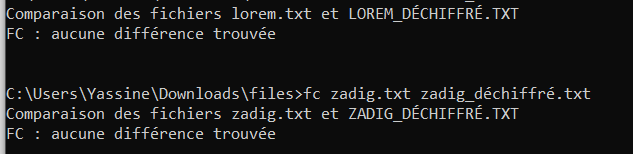

Pour utiliser diff, j'ai utilisé une machine virtuelle pour avoir le terminal ubuntu.
J'ai eu un problème avec la commande diff pour zadig et zadig_déchiffré.
J'ai utilisé la commande meld pour comparer les fichiers lignes à lignes et j'ai obtenu ce message: 
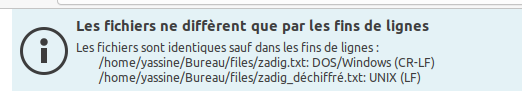
J'ai donc essayé de convertir les fins de lignes du fichier zadig.txt(télécharger sur github) au format UNIX (LF).
J'ai utilisé la commande dos2unix :
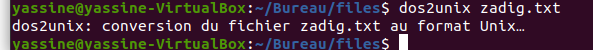
Il faut également le faire pour le fichier lorem.txt(même si celui-ci tient sur une seule ligne)
J'ai réessayé la commande meld et ainsi réussi à avoir des fichiers identiques que ce soit pour lorem ou zadig:
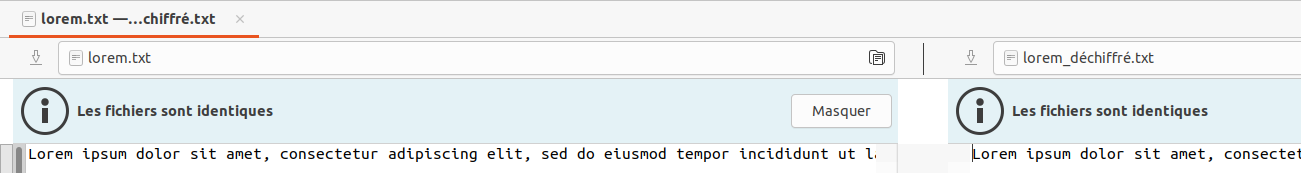
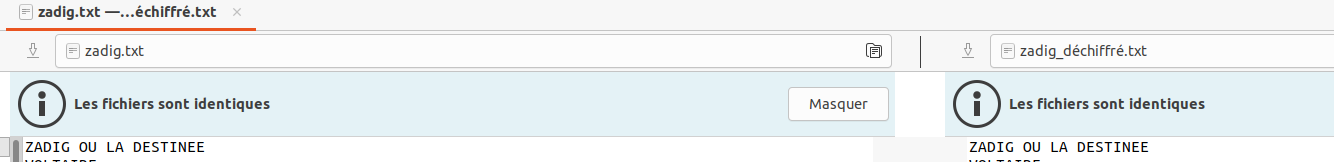
J'ai testé à nouveau diff mais je n'arrive pas à règler cette erreur persistente:
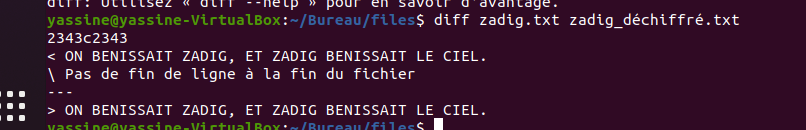